In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [ ]:
df = pd.read_csv('preprocess_311_2.csv')

In [ ]:
df.head()
df

,Unnamed: 0,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,...,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,0,708871766,2021-12-23,1900-01-01 13:30:00,126,MISCELLANEOUS PENAL LAW,640.0,AGGRAVATED HARASSMENT 1,1,1,...,241853.0,0,0,1,40.830443,-73.871349,"(40.83044253800006, -73.871349147)",2,1,1
1,1,498849139,2019-12-31,1900-01-01 01:00:00,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",1,2,...,156860.0,0,1,1,40.596994,-73.767859,"(40.59699444300003, -73.76785904499997)",4,1,2
2,2,123171799,2021-12-31,1900-01-01 21:15:00,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",1,1,...,237277.0,0,4,1,40.817877,-73.865994,"(40.81787660100008, -73.86599391299995)",5,1,1
3,3,725872999,2021-12-21,1900-01-01 23:00:00,114,ARSON,264.0,"ARSON, MOTOR VEHICLE 1 2 3 & 4",1,1,...,252550.0,0,0,0,40.859744,-73.826259,"(40.859743612000045, -73.82625891199996)",0,0,3
4,4,432371969,2021-12-31,1900-01-01 18:20:00,113,FORGERY,725.0,"FORGERY,M.V. REGISTRATION",1,1,...,211420.0,2,4,1,40.746775,-73.780867,"(40.74677541300008, -73.78086726799995)",0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298670,1307198,760213478,2020-01-11,1900-01-01 23:15:00,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,VIOLATION OF ORDER OF PROTECTI,1,3,...,229240.0,3,1,1,40.795884,-73.948889,"(40.79588378900007, -73.94888941899995)",4,1,2
1298671,1307199,582307156,2020-01-07,1900-01-01 18:15:00,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",1,3,...,243801.0,4,4,2,40.835820,-73.902446,"(40.83581973900005, -73.90244649499994)",0,0,3
1298672,1307200,431602841,2019-10-20,1900-01-01 00:00:00,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",1,2,...,215567.0,0,0,0,40.758359,-73.959953,"(40.75835936800007, -73.95995279699997)",3,3,2
1298673,1307201,263584492,2020-01-10,1900-01-01 11:00:00,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",1,3,...,197796.0,0,2,1,40.709589,-74.009527,"(40.70958890500003, -74.00952745799998)",0,0,3


In [ ]:
df_crime = df.groupby(by='OFNS_DESC', as_index=False)['CMPLNT_NUM'].count()
df_crime_num = df_crime.sort_values(by='CMPLNT_NUM', ascending=False)
df_crime_num['Proportion%'] = df_crime_num['CMPLNT_NUM']/sum(df_crime_num['CMPLNT_NUM'])*100

In [ ]:
df_crime_num.head(5)

,OFNS_DESC,CMPLNT_NUM,Proportion%
52,PETIT LARCENY,255007,19.636269
26,HARRASSMENT 2,211275,16.268780
5,ASSAULT 3 & RELATED OFFENSES,143256,11.031122
9,CRIMINAL MISCHIEF & RELATED OF,137333,10.575034
24,GRAND LARCENY,116574,8.976532


The top 5 crimes are Petit Larceny, Harassment, assault, criminal mischief, and grand larceny.
We will specifically analysis the top 5 crimes around the subway station

In [ ]:
# Geodf1=gpd.read_file('./Buffer1/geo_export_b54fbdfd33_Buffer1.shp')
# Geodf1.head()

,Shape_Leng,Shape_Area,geometry
0,5.533054,0.017836,"MULTIPOLYGON (((-73.96984 40.58062, -73.96986 ..."


In [ ]:
# Geodf2=gpd.read_file('./Buffer2/geo_export_b54fbdfd33_Buffer2.shp')
# Geodf2.head()

,Shape_Leng,Shape_Area,geometry
0,6.202771,0.012982,"MULTIPOLYGON (((-73.97195 40.57865, -73.97209 ..."


In [ ]:
Geodf3=gpd.read_file('./Half/half_miles.shp')
Geodf3.head()

,Shape_Leng,Shape_Area,geometry
0,2.995778,0.034635,"MULTIPOLYGON (((-73.74722 40.60031, -73.74738 ..."


In [ ]:
Geodf4=gpd.read_file('./Quarter/quater_miles.shp')
Geodf4.head()

,Shape_Leng,Shape_Area,geometry
0,5.533054,0.017836,"MULTIPOLYGON (((-73.96984 40.58062, -73.96986 ..."


In [ ]:
Geodf5=gpd.read_file('./OneInEight/one_in_eight_miles.shp')
Geodf5.head()

,Shape_Leng,Shape_Area,geometry
0,5.168771,0.005718,"MULTIPOLYGON (((-73.97581 40.57423, -73.97596 ..."


In [ ]:
Geodf6=gpd.read_file('./OneInSixteen/one_in_sixteen_miles.shp')
Geodf6.head()

,Shape_Leng,Shape_Area,geometry
0,2.898174,0.001531,"MULTIPOLYGON (((-73.97591 40.57513, -73.97601 ..."


In [ ]:
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
Geodata = GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

In [ ]:
def getRestData(Geodf,Geodata):
    """
    return a list that contains inner data and outer data
    """
    Geodf= Geodf.to_crs(epsg=4326)
    GeoIn =gpd.sjoin(Geodata,Geodf, how='inner',predicate='within')
    # change to index 
    Geodata = Geodata.rename(columns={'Unnamed: 0': 'index'})
    # result
    GeoIn = GeoIn.rename(columns={'Unnamed: 0': 'index'})
    Rest1= Geodata.loc[~Geodata['index'].isin(GeoIn['index'])].copy()
    # set to crime_type
    return GeoIn, Rest1
def getPlot(InCrimeType, OutCrimeType, targetList, plot_name):
    """
    plot the graph based on incrimetype and outcrine type
    """ 
    inCrimeList = []
    outCrimeList = []
    #draw every target in the targetlist
    for i in targetList:
        inCrimeList.append(InCrimeType.loc[i]["index"])
        outCrimeList.append(OutCrimeType.loc[i]["index"])
    df = pd.DataFrame({'In': inCrimeList,
                   'Out': outCrimeList}, index=targetList) 
    ax = df.plot.bar(rot=0,figsize=(25,15),title=plot_name)
    ax.legend(loc=2,fontsize=20)
    
def getRange(Geodf, Geodata, targetList, plot_name):
    InCrime, OutCrime = getRestData(Geodf, Geodata)
    InCrimeType=InCrime.groupby(['OFNS_DESC']).agg({'index':'count'})
    OutCrimeType=OutCrime.groupby(['OFNS_DESC']).agg({'index':'count'})
    getPlot(InCrimeType, OutCrimeType, targetList,plot_name)

In [ ]:
targetList = ["PETIT LARCENY","HARRASSMENT 2","ASSAULT 3 & RELATED OFFENSES","CRIMINAL MISCHIEF & RELATED OF","GRAND LARCENY"]
# getRange(Geodf1,Geodata, targetList,"The crime numbers of top 5 crimes in range of ???")

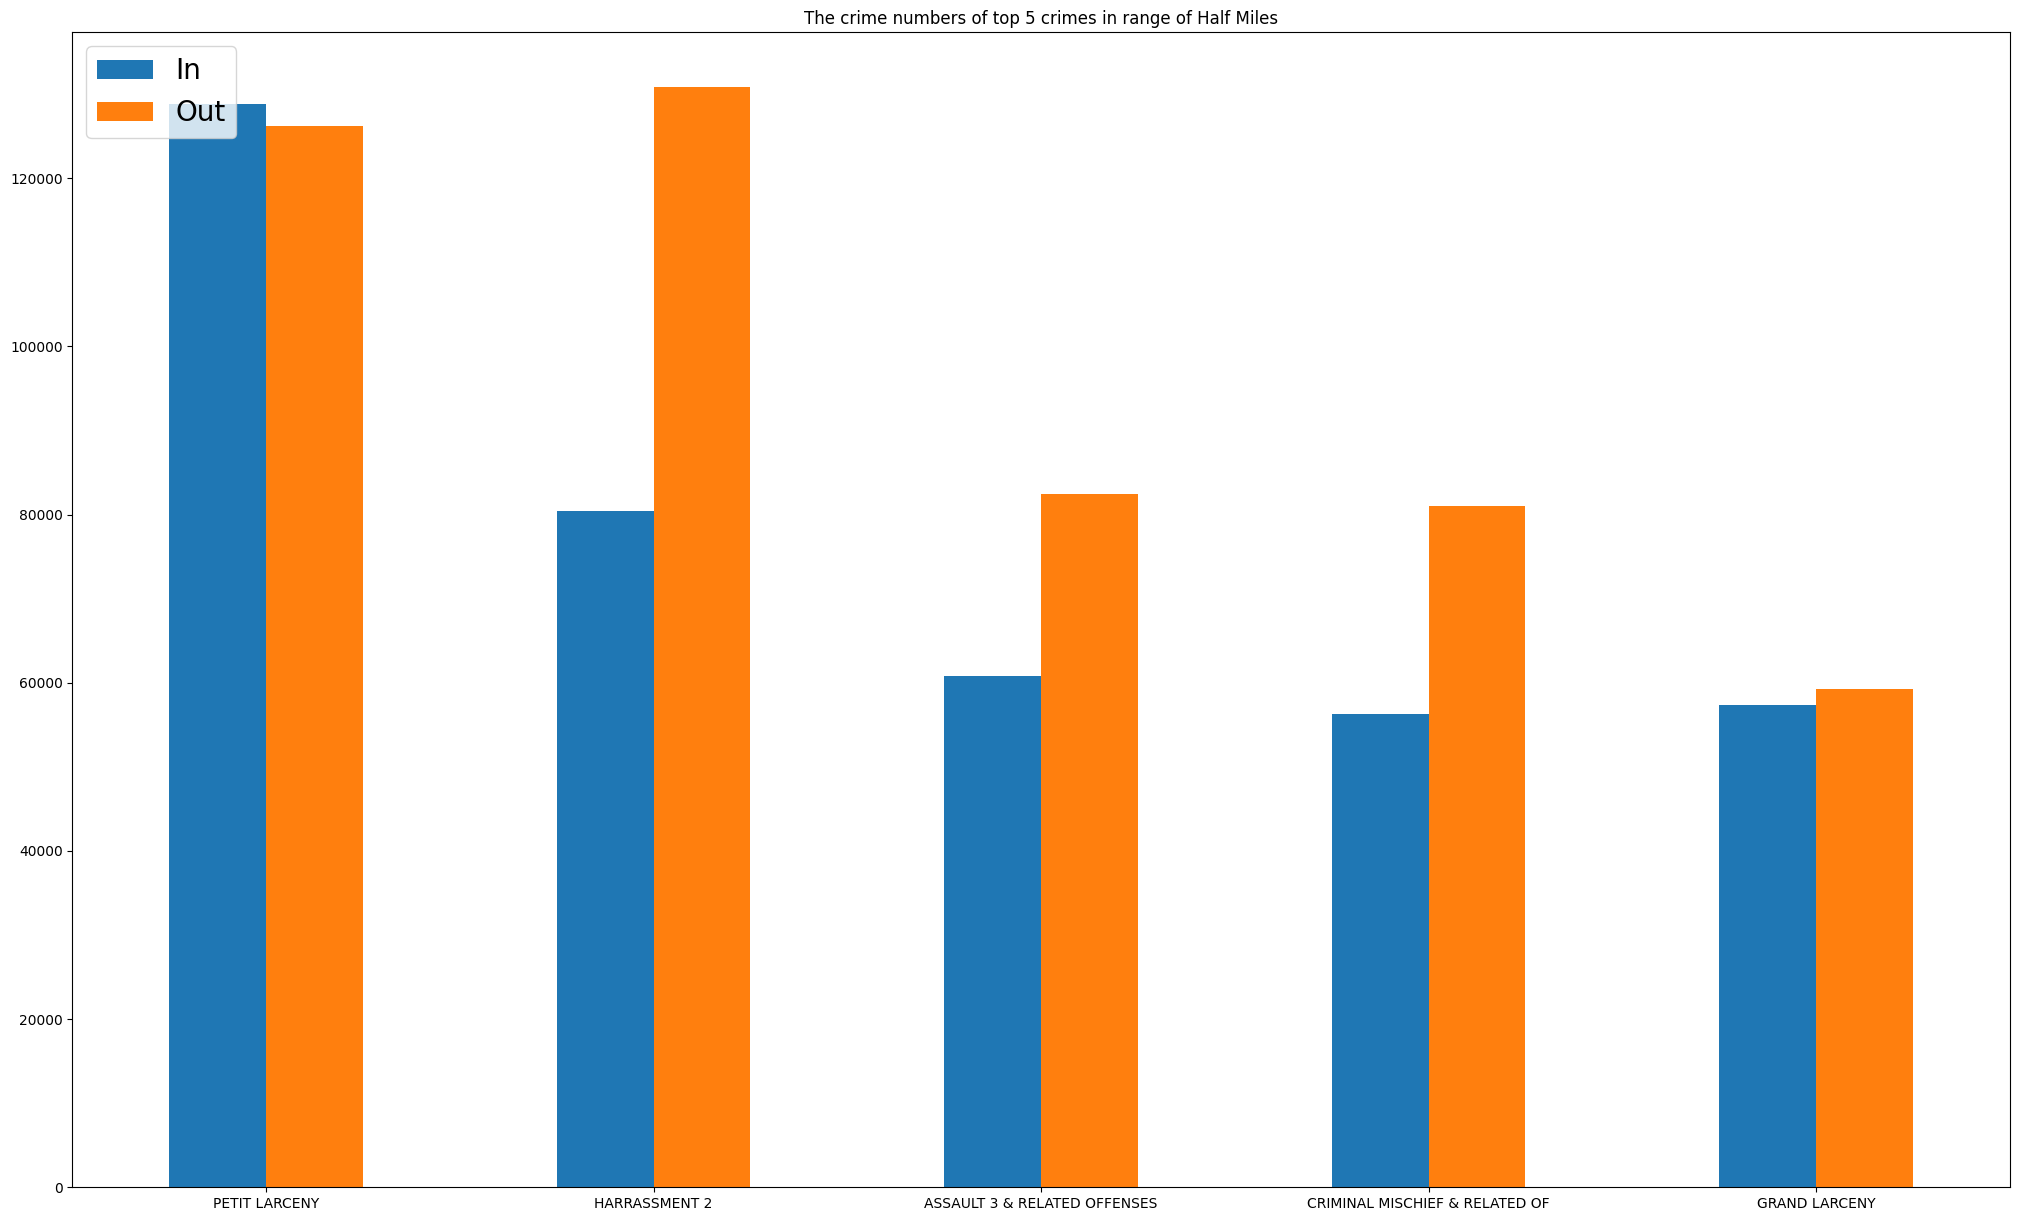

In [ ]:
getRange(Geodf2,Geodata, targetList,"The crime numbers of top 5 crimes in range of Half Miles")

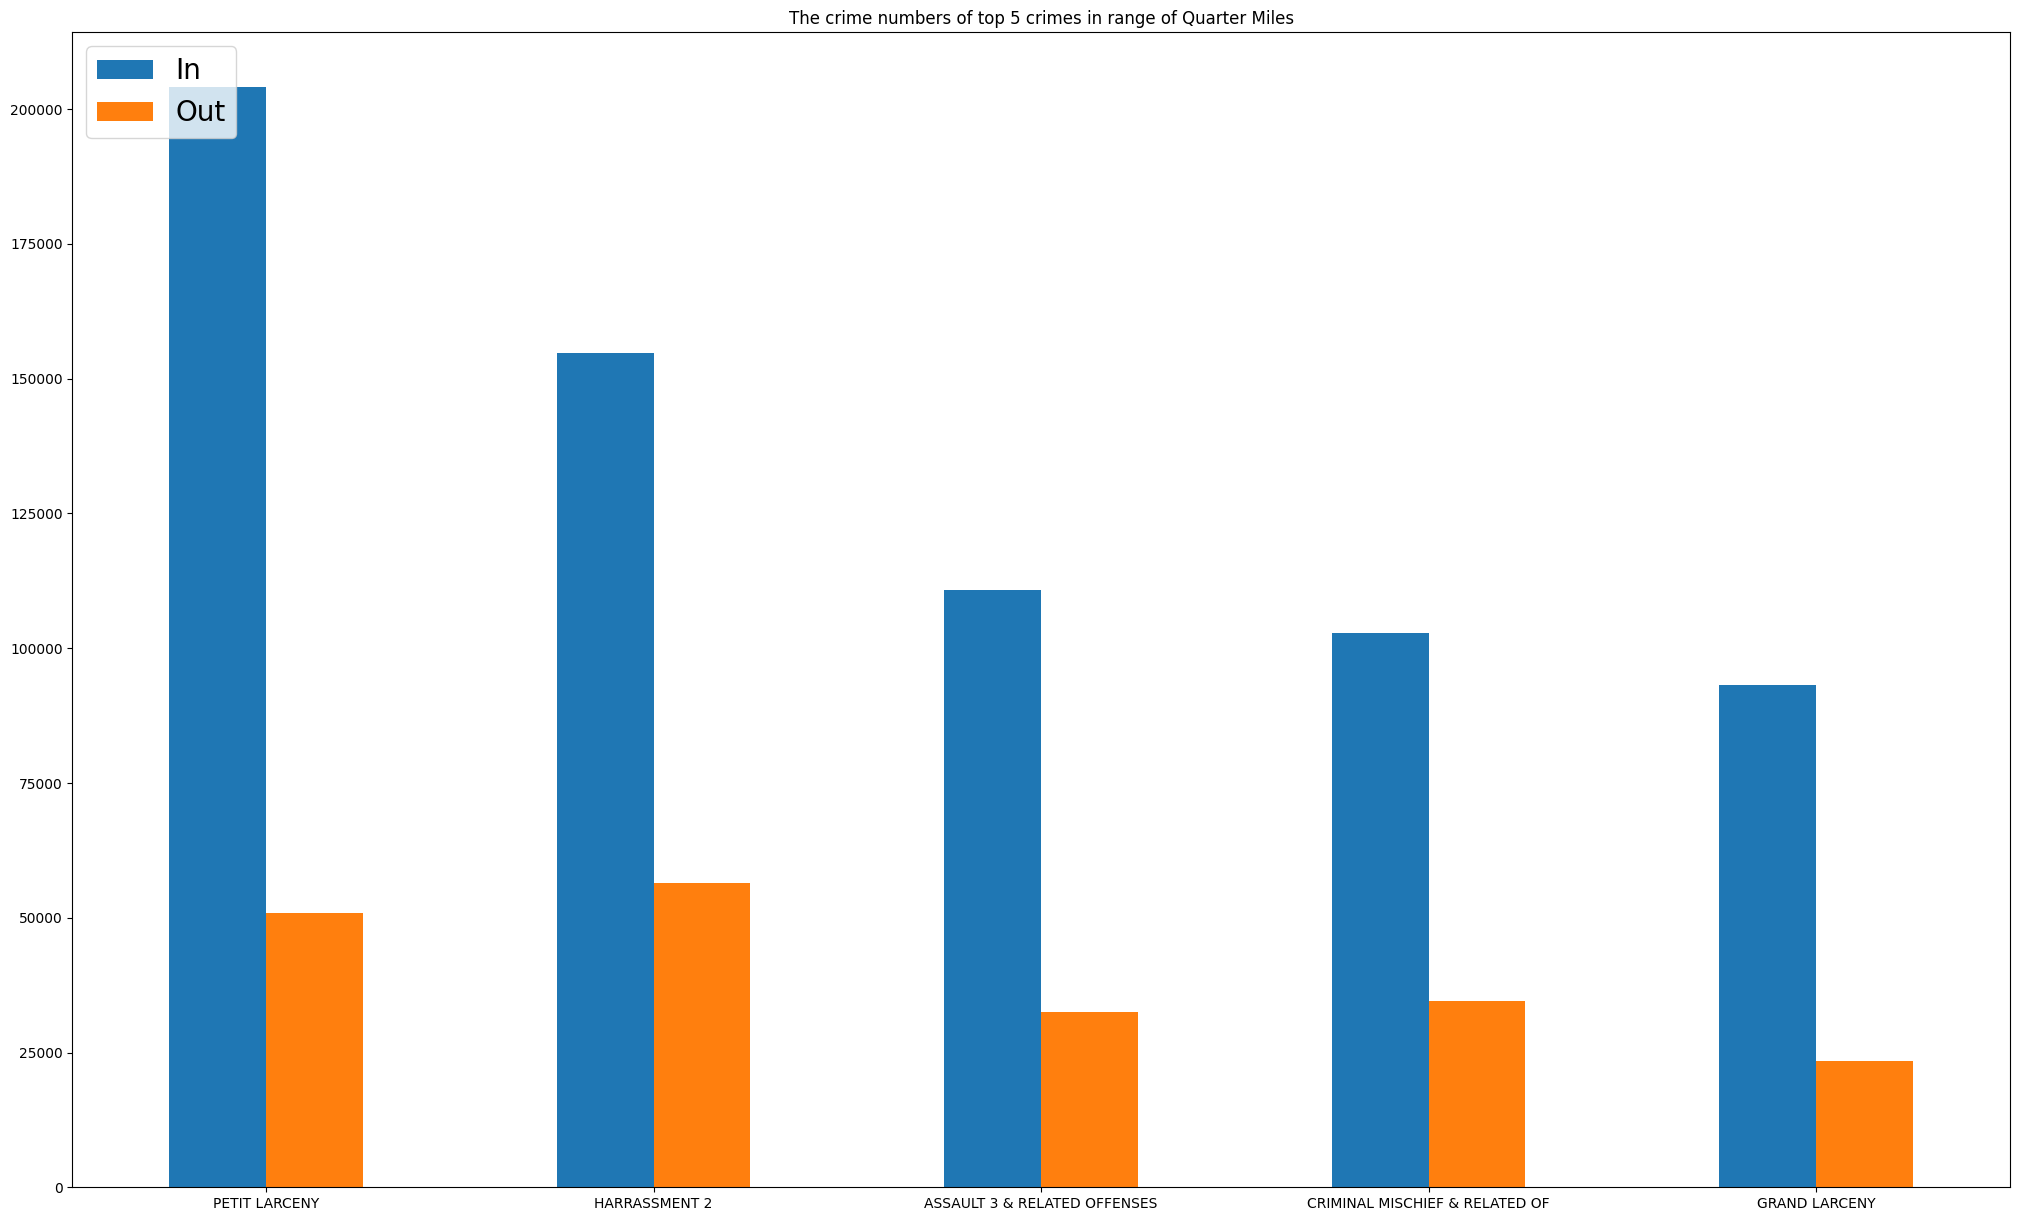

In [ ]:
getRange(Geodf3,Geodata, targetList,"The crime numbers of top 5 crimes in range of Quarter Miles")

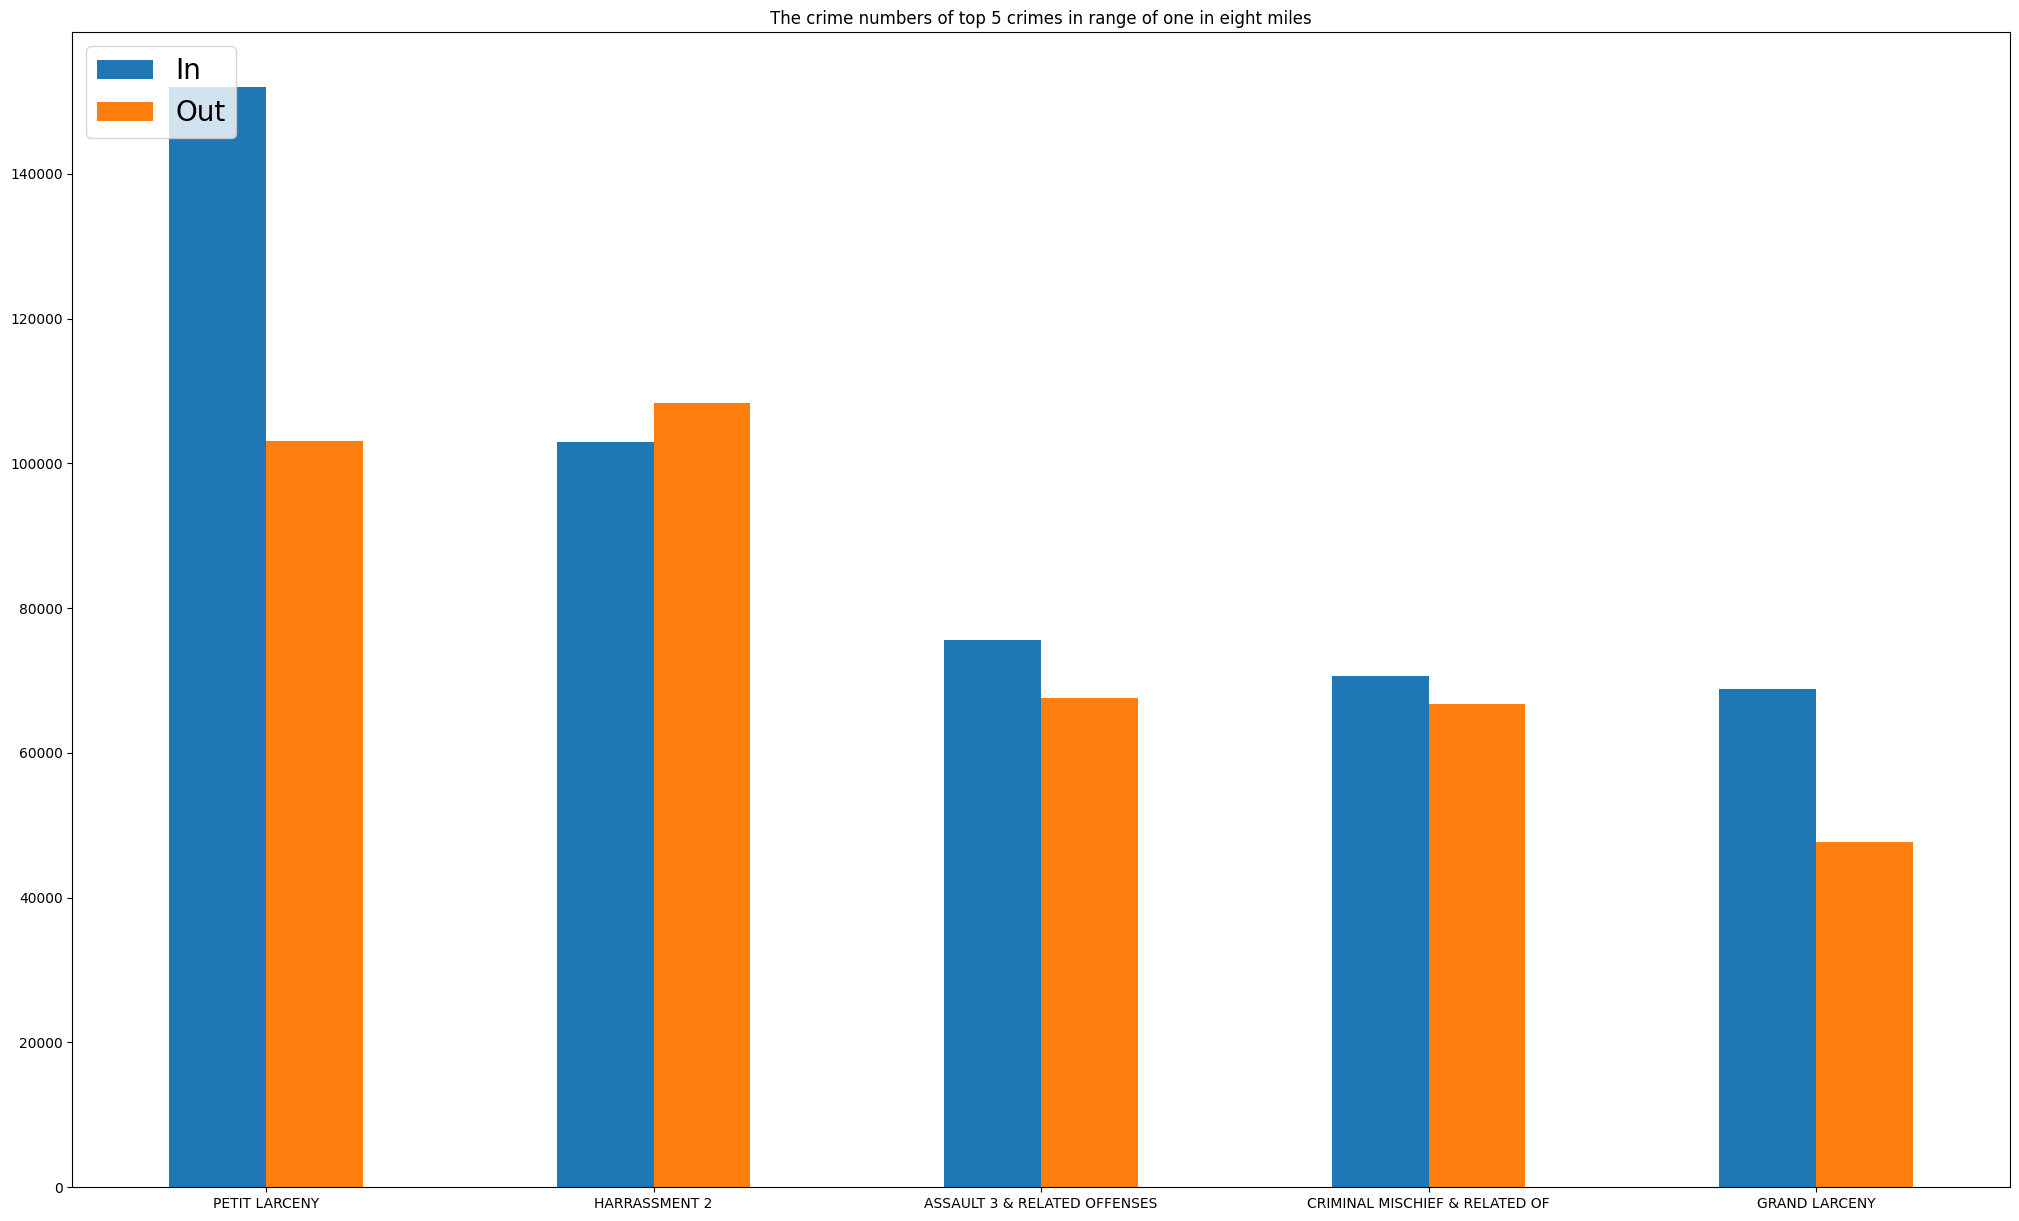

In [ ]:
getRange(Geodf4,Geodata, targetList,"The crime numbers of top 5 crimes in range of one in eight miles")

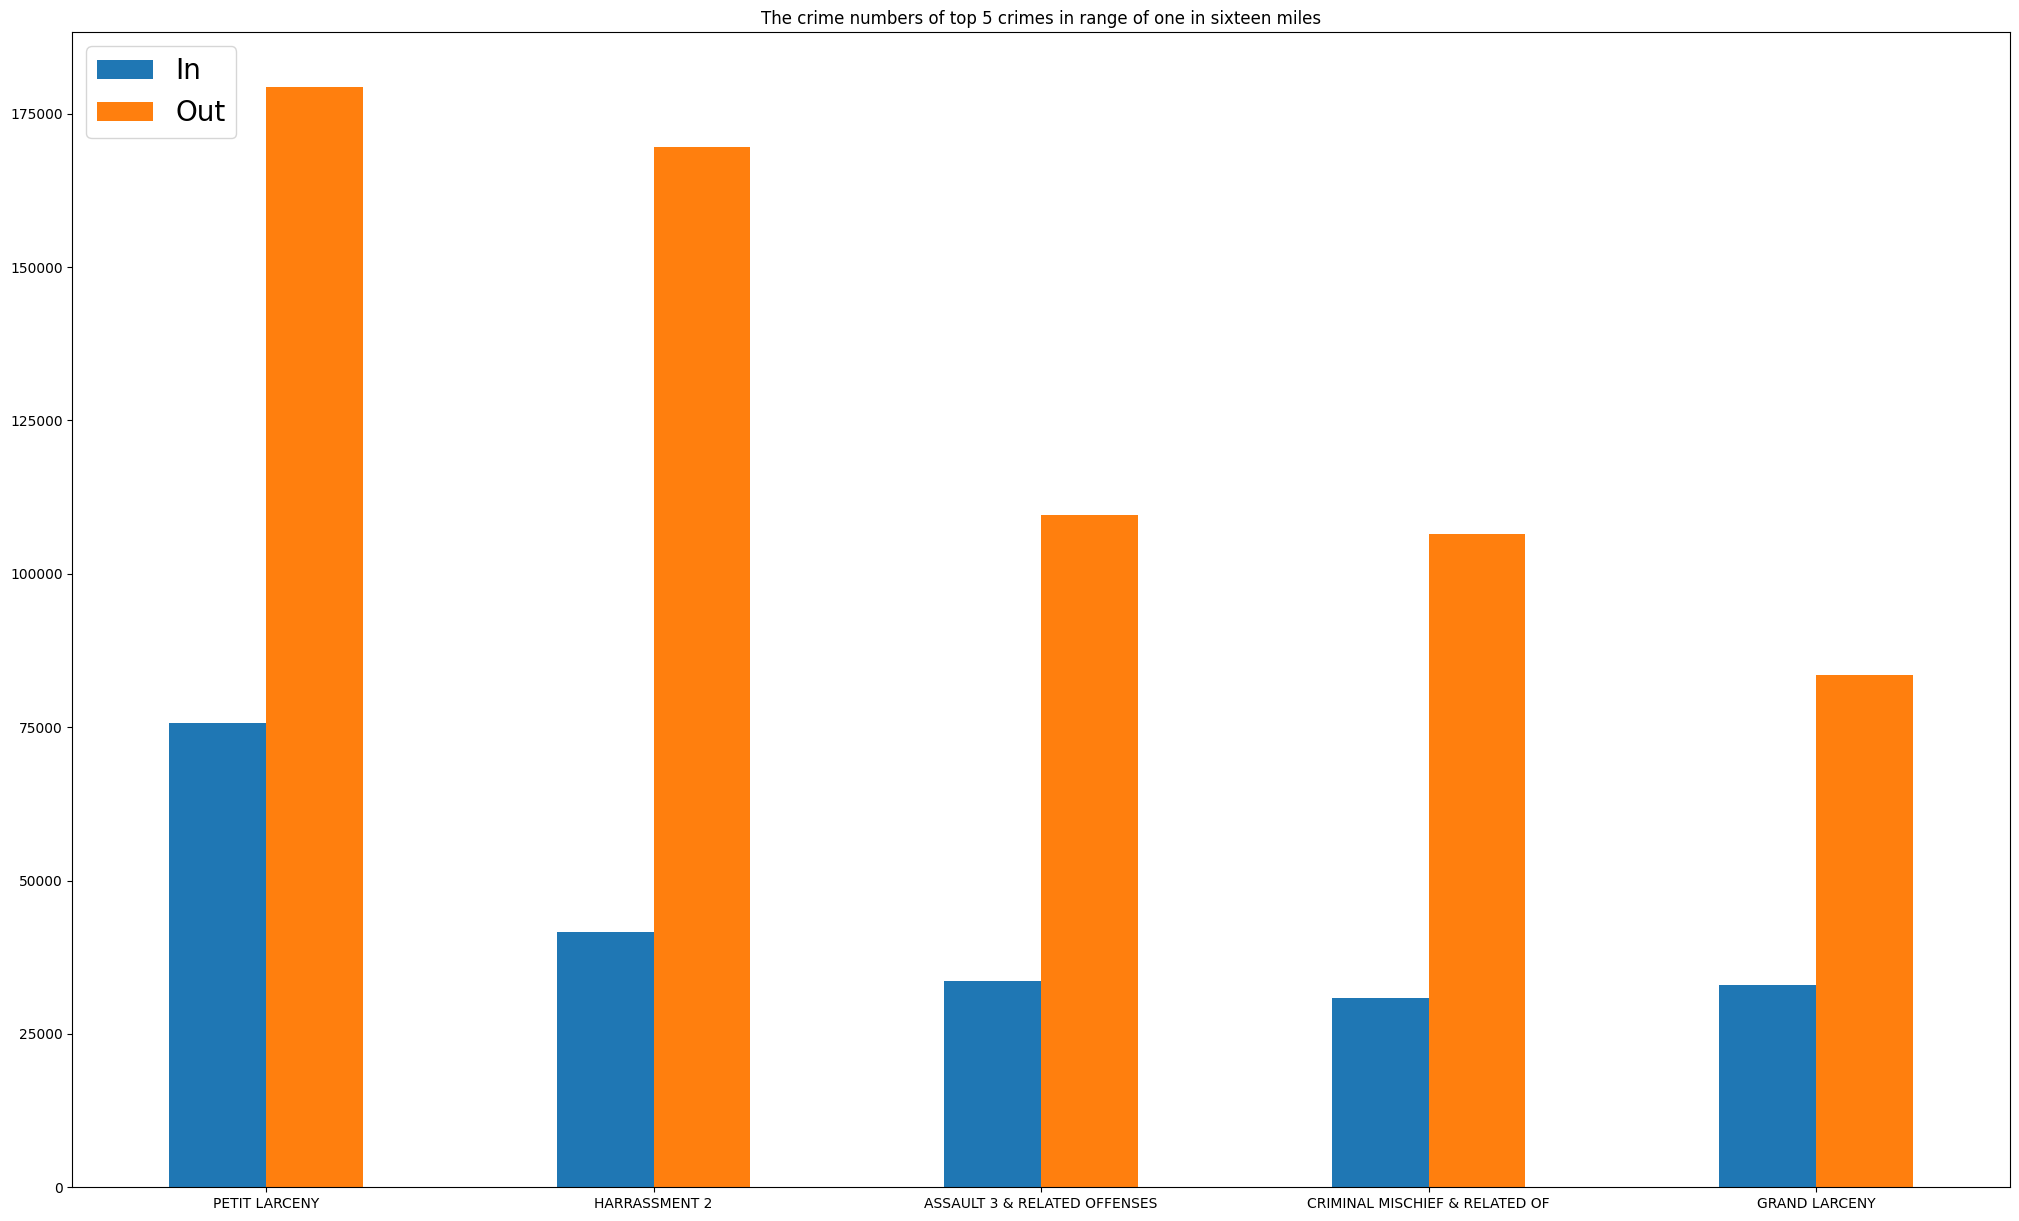

In [ ]:
getRange(Geodf5,Geodata, targetList,"The crime numbers of top 5 crimes in range of one in sixteen miles")

However, there is a limitition of those numbers
First, with more area included, the number of crime naturally grow
Second, We are calculating the area of circle, we should calculate the area of ring instead.
We will fix those two issues below

In [ ]:
def GetCrimeNumDiff(AreaLess, AreaMore):
    InCrimeLess, OutCrimeHalf = getRestData(AreaLess,Geodata)
    InCrimeMore, OutCrimeHalf = getRestData(AreaMore,Geodata)
    InCrimeLessType=InCrimeLess.groupby(['OFNS_DESC']).agg({'index':'count'})
    InCrimeMOreType=InCrimeMore.groupby(['OFNS_DESC']).agg({'index':'count'})
    inCrimeLessList = []
    inCrimeMoreList = []
    for i in targetList:
        inCrimeLessList.append(InCrimeLessType.loc[i]["index"])
        inCrimeMoreList.append(InCrimeMOreType.loc[i]["index"])
    for i in range(len(inCrimeMoreList)):
        inCrimeMoreList[i] -= inCrimeLessList[i]
    return inCrimeMoreList
    

In [ ]:
#diff of half miles and QuaterMiles
#Geodf3 half Miles
#Geodf4 Quater Miles
diff1 =  GetCrimeNumDiff(Geodf4,Geodf3)

In [ ]:
#diff of Quatermiles and One in Eight Miles
#Geodf4 Quater Miles
#Geodf5 one inn eight Miles
diff2 = GetCrimeNumDiff(Geodf5,Geodf4)

In [ ]:
#diff of one in eight miles and one in sixteenMiles
#Geodf4 Quater Miles
#Geodf5 one inn eight Miles
diff3 = GetCrimeNumDiff(Geodf6,Geodf5)

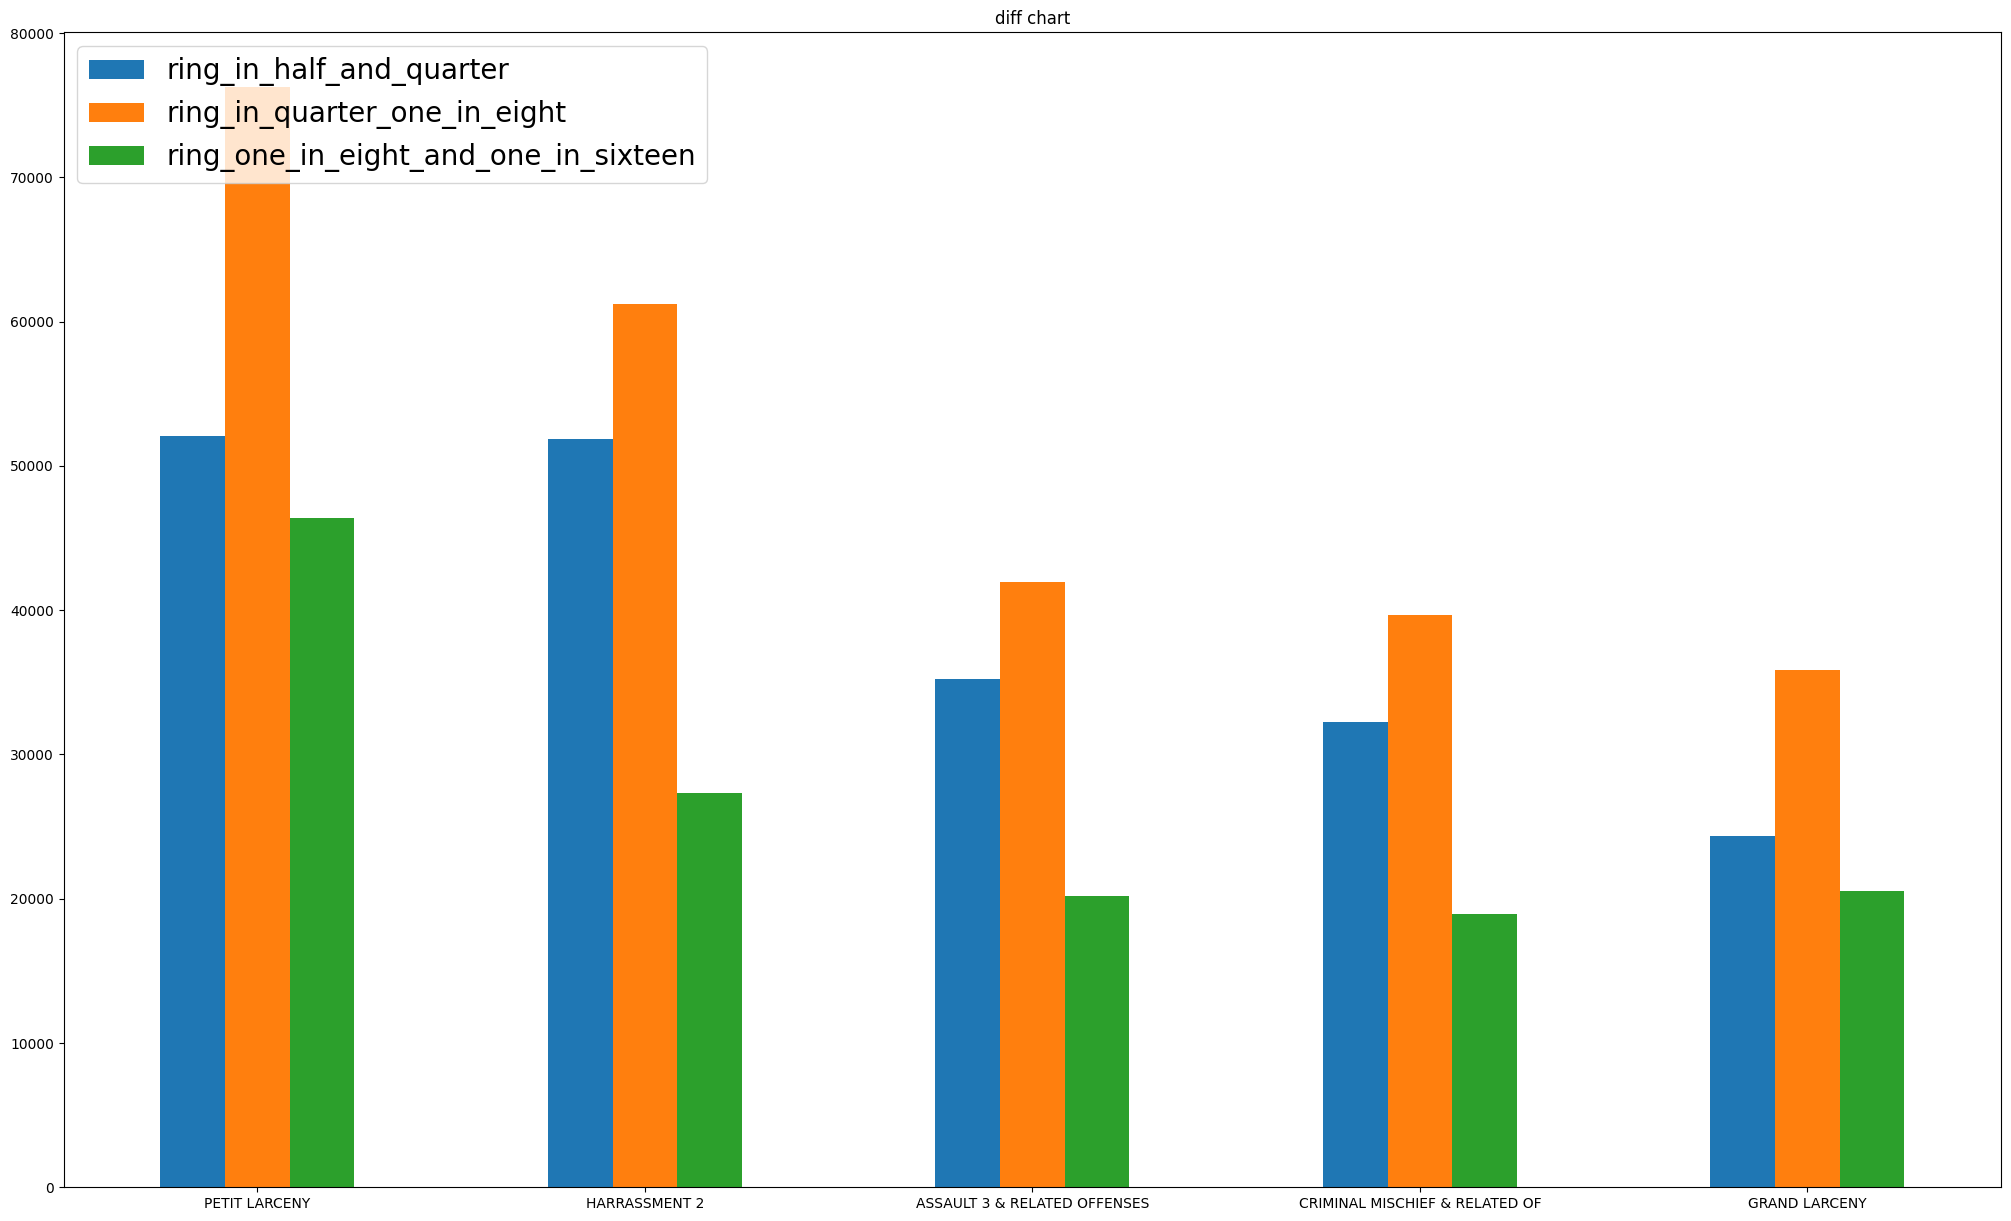

In [ ]:
df = pd.DataFrame({'ring_in_half_and_quarter': diff1,
                   'ring_in_quarter_one_in_eight': diff2,
                    'ring_one_in_eight_and_one_in_sixteen': diff3}, index=targetList) 
ax = df.plot.bar(rot=0,figsize=(25,15),title="diff chart")
ax.legend(loc=2,fontsize=20)

 we will standardize the area. This is because the area between each ring is still different.

In [ ]:
diffArea1 = Geodf3.loc[0]["Shape_Area"] - Geodf4.loc[0]["Shape_Area"]
diffArea2 = Geodf4.loc[0]["Shape_Area"] - Geodf5.loc[0]["Shape_Area"]
diffArea3 = Geodf5.loc[0]["Shape_Area"] - Geodf6.loc[0]["Shape_Area"]

In [ ]:
diffArea1 = diffArea1 * 2589988

In [ ]:
diffArea2 = diffArea2 * 2589988

In [ ]:
diffArea3 = diffArea3 * 2589988

we caclulate the space and convert it to meter squares.

In [ ]:
for i in range(len(diff1)):
    diff1[i] = diff1[i]/diffArea1
    diff2[i] = diff2[i]/diffArea2
    diff3[i] = diff3[i]/diffArea3

    

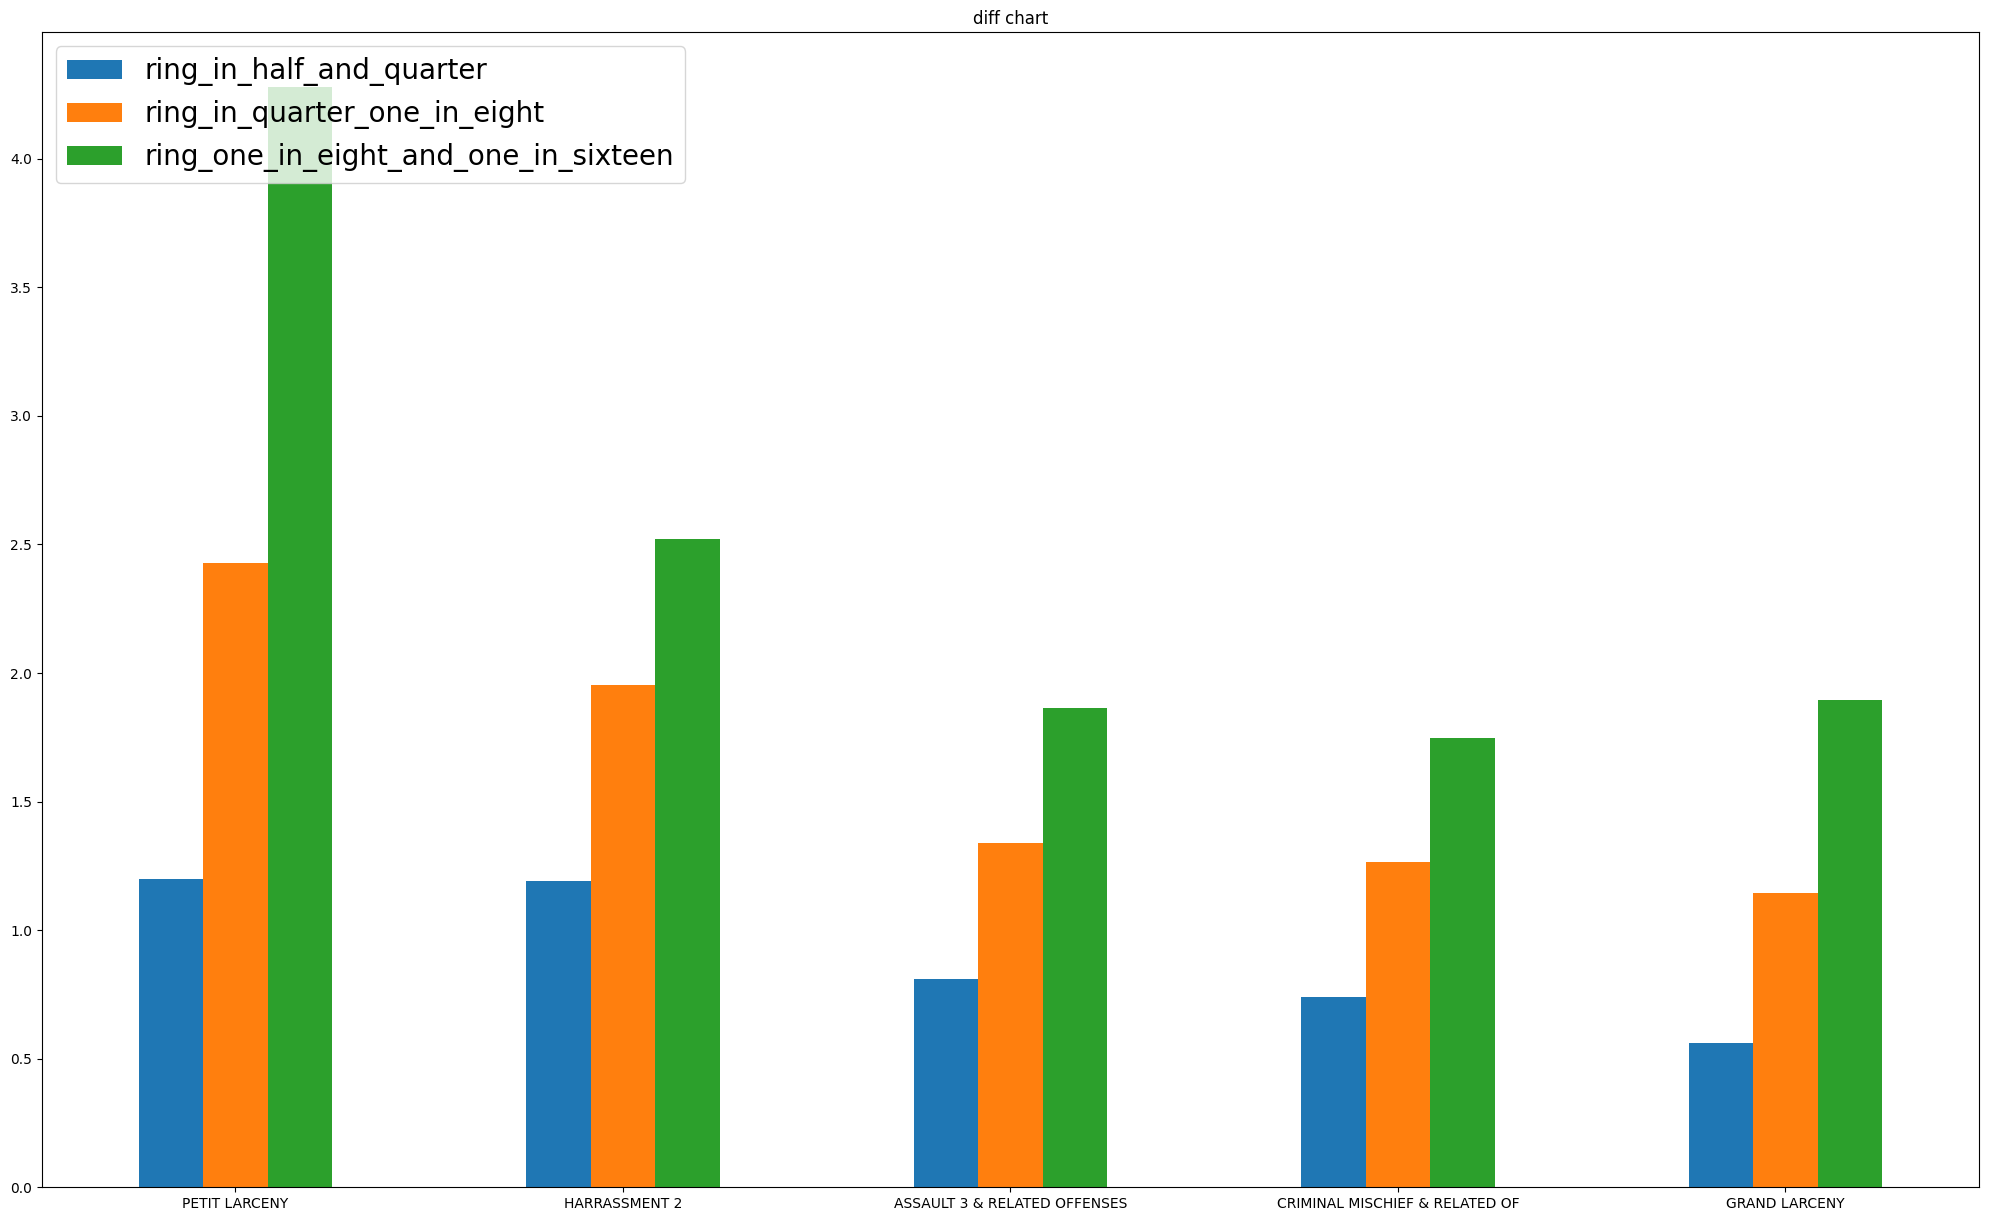

In [ ]:
df = pd.DataFrame({'ring_in_half_and_quarter': diff1,
                   'ring_in_quarter_one_in_eight': diff2,
                    'ring_one_in_eight_and_one_in_sixteen': diff3}, index=targetList) 
ax = df.plot.bar(rot=0,figsize=(25,15),title="diff chart")
ax.legend(loc=2,fontsize=20)